In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.neighbors import KNeighborsClassifier
def generate_data_matrix(mainPath):
    label = 1
    data = []
    labels = []
    directories = os.listdir(path=mainPath)
    for directory in directories:
        path = os.path.join(mainPath,directory)
        files = os.listdir(path=path)
        for file in files:
            file_path=os.path.join(path,file)
            img = np.array(convert_pgm(file_path))
            img=img.flatten()
            data.append(img)
            labels.append(label)
        label+=1
    return [data,labels]
    
def convert_pgm(pgm_file_path):
    f=open(pgm_file_path,'rb')
    for l in range(3):
        f.readline()
    img = []
    for i in range(112):
        row = []
        for i in range(92):
            row.append(ord(f.read(1)))
        img.append(row)
    return img


        

data, labels = generate_data_matrix("archive")
data = np.array(data)
labels = np.array(labels)
labels = labels.reshape(400,1)





In [2]:
X_train = data[::2, :] #odd rows for training set
Y_train = labels[::2, :].reshape(200,)
X_test = data[1::2,:] #even row for test set
Y_test = labels[1::2, :].reshape(200,)


# PCA 

In [3]:
def PCA(X_train, alpha):
    mean = np.mean(X_train, axis = 0) #Computing Mean
    Z_train = X_train - mean # Centering the data
    #centering test set
    Z_test=X_test-mean
    cov = (1/400) * np.dot(Z_train.T, Z_train)
    eigen_values, eigen_vectors = np.linalg.eigh(cov)
    #sorting eigen values
    idx=np.argsort(eigen_values)[::-1]
    eigen_values=eigen_values[idx]
    eigen_vectors=eigen_vectors[:,idx]
    #Y_train = Y_train.reshape(200,)
    #Y_test = Y_test.reshape(200,)
    #alphas = [0.8, 0.85, 0.9, 0.95,1,1.5,2,2.5,3,3.5,4]
    sum_eigen_values = sum(eigen_values)
    for i in range(len(eigen_values)):
        var=sum(eigen_values[0:i+1:])/sum_eigen_values
        if var >= alpha:
            print("for alpha = " + str(alpha) + " explained variance = " + str(var))
            break
        else:
            continue
    P = eigen_vectors[:,:i+1] # Projection Matrix
    return [P, var, Z_train, Z_test] # Return projection matrix and explained variance.

In [4]:
def knn(X_train,Y_train,X_test,Y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train.T, Y_train)
    accuracy = knn.score(X_test.T, Y_test)
    return accuracy

In [5]:
# #sorting eigen values
# idx=np.argsort(eigen_values)[::-1]
# eigen_values=eigen_values[idx]
# eigen_vectors=eigen_vectors[:,idx]
# Y_train = Y_train.reshape(200,)
# Y_test = Y_test.reshape(200,)
# alphas = [0.8, 0.85, 0.9, 0.95,1,1.5,2,2.5,3,3.5,4]

for alpha = 0.8 explained variance = 0.8016420916774841
At alpha = 0.8, The mean accuracy = 0.94
for alpha = 0.85 explained variance = 0.8524364417233415
At alpha = 0.85, The mean accuracy = 0.94
for alpha = 0.9 explained variance = 0.9011651378915895
At alpha = 0.9, The mean accuracy = 0.94
for alpha = 0.95 explained variance = 0.9502719351284116
At alpha = 0.95, The mean accuracy = 0.93


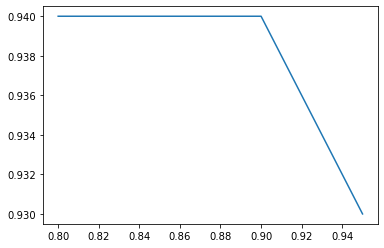

In [6]:
#sum_eigen_values = sum(eigen_values)
alphas = [0.8, 0.85, 0.9, 0.95]
accuracy_for_each_alpha = []
for alpha in alphas:
#    for i in range(len(eigen_values)):
#         var=sum(eigen_values[0:i+1:])/sum_eigen_values
#         if var >= alpha:
#             print("for alpha = " + str(alpha) + " explained variance = " + str(var))
#             break
#         else:
#             continue
#     P=eigen_vectors[:,:i+1]
    P, var, Z_train, Z_test = PCA(X_train, alpha)
    projected_Z_train = np.dot(P.T, Z_train.T)
    projected_Z_test = np.dot(P.T, Z_test.T)
    accuracy = knn(projected_Z_train,Y_train, projected_Z_test, Y_test,1)
#     knn = KNeighborsClassifier(n_neighbors=1)
#     knn.fit(projected_Z_train.T, Y_train)
    #accuracy = knn.score(projected_Z_test.T, Y_test)
    accuracy_for_each_alpha.append(accuracy)
    print("At alpha = " + str(alpha) + ", The mean accuracy = " + str(accuracy))
    

plt.plot(alphas, accuracy_for_each_alpha)
    
    
    

    
        


In [7]:
k_list = [3, 5, 7]
alpha_K = np.zeros((4,3)) #2-D array showing accuracy for each combination of alpha and K
for i in range(len(alphas)):
    P2, var2, Z_train2, Z_test2 = PCA(X_train, alphas[i])
    projected_Z_train2 = np.dot(P2.T, Z_train2.T)
    projected_Z_test2 = np.dot(P2.T, Z_test2.T)
    for j in range(len(k_list)):
        alpha_K[i][j]= knn(projected_Z_train2,Y_train, projected_Z_test2, Y_test,k_list[j]) 
        
print(alpha_K)

for alpha = 0.8 explained variance = 0.8016420916774841
for alpha = 0.85 explained variance = 0.8524364417233415
for alpha = 0.9 explained variance = 0.9011651378915895
for alpha = 0.95 explained variance = 0.9502719351284116
[[0.875 0.825 0.775]
 [0.87  0.825 0.755]
 [0.875 0.81  0.74 ]
 [0.865 0.79  0.715]]
